<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://stackoverflow.com/questions/56062673/clustering-the-3d-points-when-given-the-x-y-z-coordinates-using-dbscan-algorithm

https://stackoverflow.com/questions/26246015/python-dbscan-in-3-dimensional-space

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb#scrollTo=5VTyr2yaDAcK

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/14_machine_learning_basics/unsupervised_machine_learning.html

(10000, 3)
(10000,)


Counter({0: 929,
         1: 925,
         2: 931,
         3: 1917,
         4: 936,
         5: 940,
         -1: 621,
         6: 930,
         7: 942,
         8: 929})

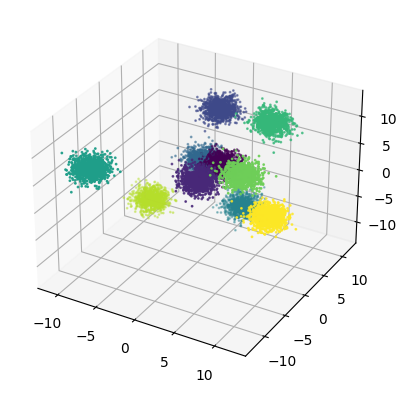

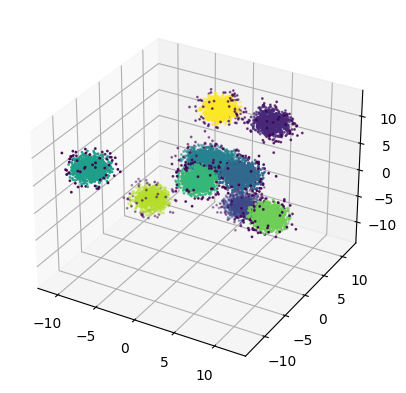

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10000, centers=10, n_features=3,random_state=0)

print(X.shape)
print(y.shape)

#from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=y, s=1)


model = DBSCAN(eps=1, min_samples=50)
model.fit_predict(X)
pred = model.fit_predict(X)

#from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=model.labels_, s=1)
from collections import Counter
Counter(model.labels_)

In [ ]:

from sklearn.cluster import DBSCAN
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10000, centers=10, n_features=3,random_state=0)


#add dots to napari

import napari
from skimage import img_as_float

viewer = napari.Viewer()
points = np.array(X)

point_properties = {
    #'confidence': np.array(img_as_float(model.labels_)),
    'confidence': np.array(img_as_float(y)),

}

points_layer = viewer.add_points(
    points,
    properties=point_properties,
    face_color='confidence',
    face_colormap='viridis',
    size = 0.1
)


#prediction

db = DBSCAN(eps=1, min_samples=50).fit(X)
labels = db.labels_
np.unique(labels)

point_properties = {
    #'confidence': np.array(img_as_float(model.labels_)),
    'confidence': np.array(img_as_float(labels)),

}

prediction_layer = viewer.add_points(
    points,
    properties=point_properties,
    face_color='confidence',
    face_colormap='viridis',
    size = 0.1
)
